In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
bag=pd.read_csv('bag.csv')
bag.head()

NameError: name 'pd' is not defined

In [3]:
bag=pd.read_csv('bag.csv',index_col=[0],parse_dates=True,squeeze=True)

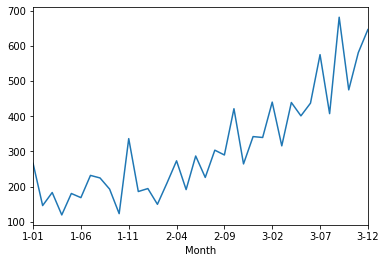

In [4]:
bag.plot()

In [5]:
bag_ma=bag.rolling(window=10).mean()

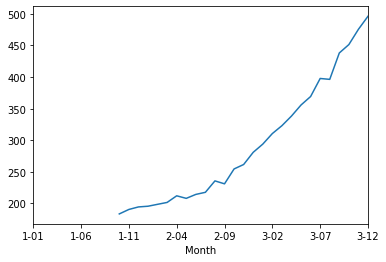

In [6]:
bag_ma.plot()

In [7]:
bag_base=pd.concat([bag,bag.shift(1)],axis=1)
bag_base.head()

,Sales,Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [8]:
bag_base.columns=['Actual_Sales','Forecast_Sales']
bag_base[25:36]

,Actual_Sales,Forecast_Sales
Month,,
3-02,440.4,339.7
3-03,315.9,440.4
3-04,439.3,315.9
3-05,401.3,439.3
3-06,437.4,401.3
3-07,575.5,437.4
3-08,407.6,575.5
3-09,682.0,407.6
3-10,475.3,682.0


In [9]:
bag_base.dropna(inplace=True)

In [10]:
bag_base.head()

,Actual_Sales,Forecast_Sales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3


In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [12]:
bag_error=mean_squared_error(bag_base.Actual_Sales,bag_base.Forecast_Sales)
bag_error

11715.388285714285

In [13]:
np.sqrt(bag_error)

108.23764726616282

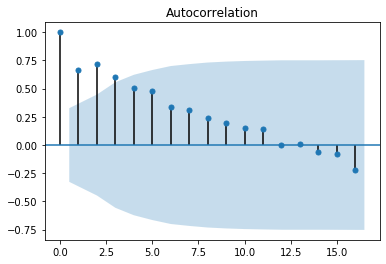

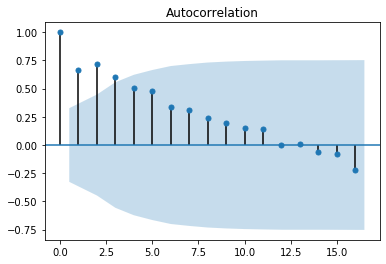

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(bag)

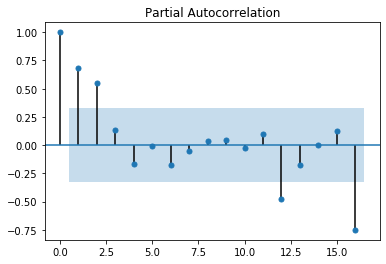

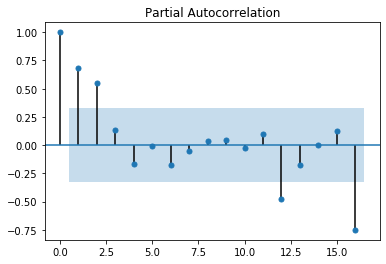

In [15]:
#Q=3,p=2,d=0-2
plot_pacf(bag)

In [16]:
from statsmodels.tsa.arima_model import ARIMA

In [17]:
bag_train=bag[0:25]
bag_test=bag[25:36]

In [18]:
bag_model=ARIMA(bag_train,order=(3,2,3))

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [19]:
bag_model_fit=bag_model.fit()

In [20]:
bag_model_fit.aic

267.74910008301515

In [21]:
bag_forecast=bag_model_fit.forecast(steps=11)[0]
bag_forecast

array([439.54377642, 388.50085044, 401.24137766, 402.34896037,
       483.94200124, 507.78665399, 516.44086739, 502.57386639,
       545.08466835, 597.48422267, 637.39194792])

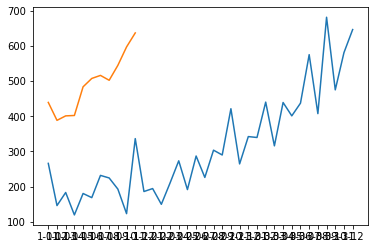

In [23]:
plt.plot(bag)
plt.plot(bag_forecast)

In [25]:
np.sqrt(mean_squared_error(bag_test,bag_forecast))

75.51925380974494

In [26]:
p_values=range(0,5)
d_values=range(0,3)
q_values=range(0,5)

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
for p in p_values:
    for q in q_values:
        for d in d_values:
            order=(p,q,d)
            train,test=bag[0:25],bag[25:36]
            predictions=list()
            for i in range(len(test)):
                try:
                    model=ARIMA(train,order)
                    model_fit=model.fit(disp=0)
                    pred_y=model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error=mean_squared_error(test,predictions)
                    print('ARIMA%s: RMSE=%.2f'%(order,error))
                except:
                    continue
            

ARIMA(0, 0, 0): RMSE=77950.15
ARIMA(0, 0, 1): RMSE=70119.28
ARIMA(0, 0, 2): RMSE=58566.48
ARIMA(0, 1, 0): RMSE=33849.87
ARIMA(0, 1, 1): RMSE=40654.02
ARIMA(0, 1, 2): RMSE=34511.83
ARIMA(0, 2, 0): RMSE=34017.03
ARIMA(0, 2, 1): RMSE=28392.48
ARIMA(1, 0, 0): RMSE=61158.70
ARIMA(1, 0, 1): RMSE=46528.64
ARIMA(1, 0, 2): RMSE=43922.42
ARIMA(1, 1, 0): RMSE=31687.07
ARIMA(1, 1, 1): RMSE=42176.67
ARIMA(1, 2, 0): RMSE=18845.84
ARIMA(1, 2, 1): RMSE=26129.55
ARIMA(2, 0, 0): RMSE=45248.21
ARIMA(2, 0, 1): RMSE=25545.11
ARIMA(2, 1, 0): RMSE=35488.32
ARIMA(2, 1, 1): RMSE=39633.98
ARIMA(2, 1, 2): RMSE=35884.79
ARIMA(2, 2, 0): RMSE=34024.23
ARIMA(3, 0, 0): RMSE=46326.45
ARIMA(3, 0, 1): RMSE=26203.11
ARIMA(3, 1, 0): RMSE=22024.85
ARIMA(3, 1, 1): RMSE=22841.65
ARIMA(3, 1, 2): RMSE=18095.36
ARIMA(3, 2, 0): RMSE=24695.26
ARIMA(3, 2, 1): RMSE=16368.69
ARIMA(3, 2, 2): RMSE=15804.23
ARIMA(4, 0, 0): RMSE=33233.29
ARIMA(4, 0, 1): RMSE=28345.16
ARIMA(4, 1, 0): RMSE=22339.38
ARIMA(4, 1, 1): RMSE=22615.99
ARIMA(4, 1

In [ ]:
_